## Libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import numpy as np
import warnings
from gnat import gtf_tools
import pandas as pd
from io import StringIO
from Bio import Phylo
from matplotlib import gridspec

## Functions

In [180]:
def plot_sine_wave(freq, amp, start, stop, ax, xoffset, yoffset, color='tab:blue'):
    # Generate time values
    t = np.linspace(start, stop, 1000)
    
    # Generate the sine wave
    sine_wave = amp * np.sin(2 * np.pi * freq * t + xoffset) + yoffset
    ax.plot(t, sine_wave, color=color, linewidth=3)

## Define color palette

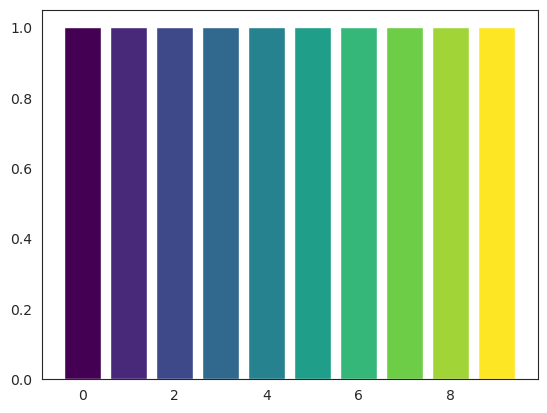

In [181]:
viridis_discrete = [
    '#440154',
    '#482878',
    '#3E4989',
    '#31688E',
    '#26828E',
    '#1F9E89',
    '#35B779',
    '#6DCD47',
    '#A1D537',
    '#FDE725'
]

# Plotting a bar chart using the viridis colors in hex format
values = range(10)
plt.bar(values, [1]*10, color=viridis_discrete)
plt.show()

## Make conceptual plot

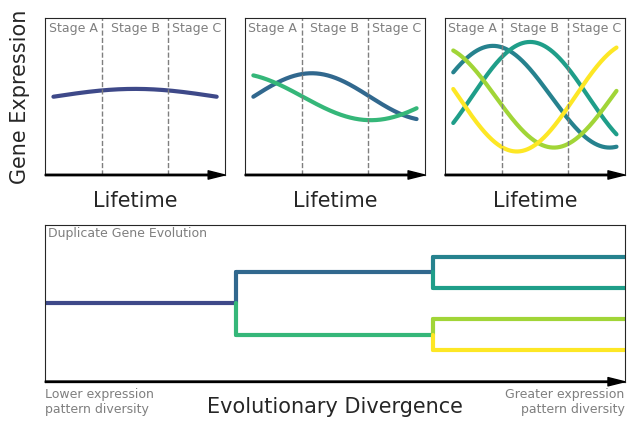

In [188]:
#ignore warnings
warnings.filterwarnings("ignore")

#set style
sns.set_style('white')


#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = 'cmr10' 

#initialize figure
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6.5)

#add subplots
ax1 = plt.subplot2grid(shape=(3, 3), loc=(0, 0), colspan=1)
ax2 = plt.subplot2grid(shape=(3, 3), loc=(0, 1), colspan=1)
ax3 = plt.subplot2grid(shape=(3, 3), loc=(0, 2), colspan=1)
ax4 = plt.subplot2grid(shape=(3, 3), loc=(1, 0), colspan=3, rowspan=1)

#ax1.axis('off')
#ax2.axis('off')
#ax3.axis('off')
#ax4.axis('off')


#make tree
#trunck
ax4.axhline(y=0.5, xmax=0.33, linewidth=3, color=viridis_discrete[2])
#first branches
ax4.axvline(x=0.33, ymax=0.7, ymin=0.5, linewidth=3, color=viridis_discrete[3])
ax4.axvline(x=0.33, ymax=0.5, ymin=0.3, linewidth=3, color=viridis_discrete[6])
#second branches
ax4.axhline(y=0.7, xmax=0.67, xmin=0.33, linewidth=3, color=viridis_discrete[3])
ax4.axhline(y=0.3, xmax=0.67, xmin=0.33, linewidth=3, color=viridis_discrete[6])
#third branches
ax4.axvline(x=0.67, ymin=0.7, ymax=0.8, linewidth=3, color=viridis_discrete[4])
ax4.axvline(x=0.67, ymin=0.7, ymax=0.6, linewidth=3, color=viridis_discrete[5])
ax4.axvline(x=0.67, ymin=0.3, ymax=0.4, linewidth=3, color=viridis_discrete[8])
ax4.axvline(x=0.67, ymin=0.2, ymax=0.3, linewidth=3, color=viridis_discrete[9])
#leaves
ax4.axhline(y=0.8, xmin=0.67, linewidth=3, color=viridis_discrete[4])
ax4.axhline(y=0.6, xmin=0.67, linewidth=3, color=viridis_discrete[5])
ax4.axhline(y=0.4, xmin=0.67, linewidth=3, color=viridis_discrete[8])
ax4.axhline(y=0.2, xmin=0.67, linewidth=3, color=viridis_discrete[9])
ax4.set_xlabel('Evolutionary Divergence', fontsize=15)

ax1.set_ylabel('Gene Expression', fontsize=15)
ax1.set_xlabel('Lifetime', fontsize=15)
#ax2.set_ylabel('Expression', fontsize=15)
ax2.set_xlabel('Lifetime', fontsize=15)
#ax3.set_ylabel('Expression', fontsize=15)
ax3.set_xlabel('Lifetime', fontsize=15)

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax4.set_xticklabels([])
ax4.set_yticklabels([])

#add initial expression pattern 
plot_sine_wave(freq=0.5, amp=0.1, start=0, stop=1, ax=ax1, xoffset=0, yoffset=0, 
               color=viridis_discrete[2])
ax1.set_ylim(-1,1)

#add expression patterns after initial duplication
plot_sine_wave(freq=0.7, amp=0.3, start=0, stop=1, ax=ax2, xoffset=0, yoffset=0,
              color=viridis_discrete[3])
plot_sine_wave(freq=0.6, amp=0.3, start=0, stop=1, ax=ax2, xoffset=2, yoffset=0,
              color=viridis_discrete[6])
ax2.set_ylim(-1,1)

#add expression patterns after another duplication
plot_sine_wave(freq=0.7, amp=0.65, start=0, stop=1, ax=ax3, xoffset=0.5, yoffset=0,
              color=viridis_discrete[4])
plot_sine_wave(freq=0.7, amp=0.7, start=0, stop=1, ax=ax3, xoffset=-0.5, yoffset=0,
              color=viridis_discrete[5])
plot_sine_wave(freq=0.7, amp=0.65, start=0, stop=1, ax=ax3, xoffset=2, yoffset=0,
              color=viridis_discrete[8])
plot_sine_wave(freq=0.7, amp=0.7, start=0, stop=1, ax=ax3, xoffset=3, yoffset=0,
              color=viridis_discrete[9])

ax3.set_ylim(-1,1)
#add arrows
ax1.annotate('', xy=(1.05, -1), xytext=(-0.05, -1),
             arrowprops=dict(color='black', width=1, headwidth=6))
ax2.annotate('', xy=(1.05, -1), xytext=(-0.05, -1),
             arrowprops=dict(color='black', width=1, headwidth=6))
ax3.annotate('', xy=(1.05, -1), xytext=(-0.05, -1),
             arrowprops=dict(color='black', width=1, headwidth=6))

ax4.annotate('', xy=(1, 0), xytext=(0, 0),
             arrowprops=dict(color='black', width=1, headwidth=6))

#add stages
ax1.axvline(x=0.3, linewidth=1, color='tab:gray', linestyle='--')
ax1.axvline(x=0.7, linewidth=1, color='tab:gray', linestyle='--')
ax1.text(x=-0.03, y=0.83, s="Stage A", fontsize=9, color='tab:gray')
ax1.text(x=0.35, y=0.83, s="Stage B", fontsize=9, color='tab:gray')
ax1.text(x=0.725, y=0.83, s="Stage C", fontsize=9, color='tab:gray')

ax2.axvline(x=0.3, linewidth=1, color='tab:gray', linestyle='--')
ax2.axvline(x=0.7, linewidth=1, color='tab:gray', linestyle='--')
ax2.text(x=-0.03, y=0.83, s="Stage A", fontsize=9, color='tab:gray')
ax2.text(x=0.35, y=0.83, s="Stage B", fontsize=9, color='tab:gray')
ax2.text(x=0.725, y=0.83, s="Stage C", fontsize=9, color='tab:gray')

ax3.axvline(x=0.3, linewidth=1, color='tab:gray', linestyle='--')
ax3.axvline(x=0.7, linewidth=1, color='tab:gray', linestyle='--')
ax3.text(x=-0.03, y=0.83, s="Stage A", fontsize=9, color='tab:gray')
ax3.text(x=0.35, y=0.83, s="Stage B", fontsize=9, color='tab:gray')
ax3.text(x=0.725, y=0.83, s="Stage C", fontsize=9, color='tab:gray')

ax4.text(x=0.005, y=0.925, s="Duplicate Gene Evolution", fontsize=9, color='tab:gray')
ax4.text(x=1, y=-0.2, s="Greater expression\npattern diversity", horizontalalignment='right', fontsize=9, color='tab:gray')

ax4.text(x=0, y=-0.2, s="Lower expression\npattern diversity", horizontalalignment='left', fontsize=9, color='tab:gray')

plt.tight_layout()
plt.savefig('/home/gabe/Desktop/mtstp/figures/primary/conceptual_figure.pdf', bbox_inches='tight')

#### Case study for demonstration

In [4]:
#laod data
# load data and analysis metadata
data = pd.read_csv('/home/gabe/Desktop/mtstp/data/intermediate_data/count_tables/dpl_tpm_counts_kallisto.csv')
data.rename(columns={data.columns[0]: "sample-id" }, inplace = True)
metadata = pd.read_csv('/home/gabe/Desktop/mtstp/data/experiment_metadata/mtstp_analysis_metadata.tsv', sep="\t")

#since this analysis will onyl deal with uninfected individuals, I'll filter out all infected samples
uninfected_samples = list(metadata.loc[metadata['infection-status'] != 'infected']['sample-id'])
uninfected_data = data[data['sample-id'].isin(uninfected_samples)]
uninfected_data.set_index("sample-id", inplace = True)

In [51]:
uninfected_data

,lcl|KZ248545.1_cds_OWR45966.1_1,lcl|KZ248545.1_cds_OWR42929.1_2,lcl|KZ248545.1_cds_OWR42930.1_3,lcl|KZ248545.1_cds_OWR42931.1_4,lcl|KZ248545.1_cds_OWR42932.1_5,lcl|KZ248545.1_cds_OWR42933.1_6,lcl|KZ248545.1_cds_OWR42934.1_7,lcl|KZ248545.1_cds_OWR42935.1_8,lcl|KZ248545.1_cds_OWR42936.1_9,lcl|KZ248545.1_cds_OWR51149.1_10,...,lcl|KZ253939.1_cds_OWR46811.1_15223,lcl|KZ253939.1_cds_OWR46812.1_15224,lcl|KZ253939.1_cds_OWR46813.1_15225,lcl|KZ253939.1_cds_OWR46814.1_15226,lcl|KZ253939.1_cds_OWR46815.1_15227,lcl|KZ253939.1_cds_OWR48030.1_15228,lcl|KZ253939.1_cds_OWR48031.1_15229,lcl|KZ253939.1_cds_OWR48032.1_15230,lcl|KZ253939.1_cds_OWR48033.1_15231,lcl|KZ253939.1_cds_OWR55584.1_15232
sample-id,,,,,,,,,,,,,,,,,,,,,
mtstp5iu98,40.307900,56.571700,1108.7200,161.260000,3.714120,1.121030,0.000000,4.427440,80.614100,0.571328,...,7.63375,8.38529,5.12428,1.773930,0.788076,0.011144,21.51140,25.0025,0.000000,0.857986
mtstp3cu2,117.197000,158.977000,473.1770,50.214300,51.896000,1.055150,0.024980,3.666070,47.019600,1.520990,...,15.86870,12.53940,48.76550,3.593860,1.226600,0.291278,29.57810,105.5880,0.000000,8.049470
mtstp5cu17,53.580300,72.488100,847.3960,143.629000,6.129130,0.000000,0.000000,1.789000,68.445200,1.173910,...,8.82507,8.81382,4.24864,0.897578,0.765841,0.000000,31.69200,76.7036,0.000000,2.985790
mtstpLiu130,0.036026,0.000000,750.5200,3.536750,3.418260,0.629009,0.000000,0.529960,1.137820,11.142000,...,13.34150,5.86868,133.43200,1.111620,1.160870,0.006044,55.27390,130.0230,0.000000,0.239330
mtstpLiu133,0.025680,0.091779,439.9790,8.929790,2.229130,2.650270,1.432950,2.357130,0.270234,8.235870,...,11.09360,5.79064,146.81100,1.351020,1.207460,0.025850,38.63890,70.4854,0.000000,0.000000
mtstpEcu38,0.000000,0.011409,205.2790,0.678483,4.695950,0.953417,0.020652,0.044239,0.000000,6.483220,...,9.24495,12.27980,355.74000,3.540060,1.861930,0.008570,44.80340,223.3030,0.717028,2.056850
mtstpAiu148,20.759100,32.852500,879.6510,6.046150,6.695500,0.369350,0.351016,5.922370,4.350970,66.263500,...,34.54550,4.44715,39.52500,1.589870,1.345300,0.131708,23.62360,65.2631,0.000000,0.374311
mtstp5iu100,32.551700,40.219300,1100.9300,173.425000,5.561670,1.156950,0.000000,2.484970,86.955500,1.052060,...,9.33069,8.27777,9.11512,1.463130,0.947899,0.000000,26.54300,54.4123,0.000000,0.933983
mtstpLiu131,1.578640,1.649300,1298.7200,9.646060,0.334944,0.417812,0.834579,7.058230,2.366580,19.060900,...,21.34560,2.39756,138.19300,0.970659,0.904959,0.000000,16.73580,79.4092,0.000000,0.106698


In [5]:
protein_to_gene_dict = gtf_tools.get_gene_protein_id_dictionary('/home/gabe/Desktop/mtstp/data/intermediate_data/dpl_genes.gtf')
protein_to_gene_dict

{'OWR45966.1': 'KGM_206960A',
 'OWR42929.1': 'KGM_206960B',
 'OWR42930.1': 'KGM_206959',
 'OWR42931.1': 'KGM_206961',
 'OWR42932.1': 'KGM_206962',
 'OWR42933.1': 'KGM_206963',
 'OWR42934.1': 'KGM_206964',
 'OWR42935.1': 'KGM_206965',
 'OWR42936.1': 'KGM_206958',
 'OWR51149.1': 'KGM_206966',
 'OWR51150.1': 'KGM_206967',
 'OWR51151.1': 'KGM_206956',
 'OWR51152.1': 'KGM_206968',
 'OWR51153.1': 'KGM_206955',
 'OWR51154.1': 'KGM_206969',
 'OWR51155.1': 'KGM_206954',
 'OWR51156.1': 'KGM_206970',
 'OWR51157.1': 'KGM_206953',
 'OWR51158.1': 'KGM_206971',
 'OWR51159.1': 'KGM_206952',
 'OWR51160.1': 'KGM_206951',
 'OWR51161.1': 'KGM_206972',
 'OWR51162.1': 'KGM_206973',
 'OWR51163.1': 'KGM_206974',
 'OWR51164.1': 'KGM_206975',
 'OWR51165.1': 'KGM_206950',
 'OWR51166.1': 'KGM_206949',
 'OWR51167.1': 'KGM_206976',
 'OWR51168.1': 'KGM_206977',
 'OWR51169.1': 'KGM_206948',
 'OWR51170.1': 'KGM_206947',
 'OWR51171.1': 'KGM_206978',
 'OWR51172.1': 'KGM_206979',
 'OWR51173.1': 'KGM_206946',
 'OWR55128.1

In [6]:
#get sequence ids
#group_468
arrestin_homologs = ["OWR47047.1","OWR46083.1","OWR48177.1","OWR45931.1"]
#group_593
geranylgeranyl_homologs = ["OWR48055.1","OWR48056.1","OWR51684.1","OWR50756.1"]

#initialize dataframes to store stuff
arrestin_df = pd.DataFrame(index=uninfected_data.index)
geranylgeranyl_df = pd.DataFrame(index=uninfected_data.index)

#list to store ids
arrestin_ids = []
geranylgeranyl_ids = []
#get only columns that are the right sequences
for sequence_id in arrestin_homologs:
    arrestin_ids.append(sequence_id)
for sequence_id in geranylgeranyl_homologs:
    geranylgeranyl_ids.append(sequence_id)
    
#keep specific columns for arrestin
for column in list(uninfected_data.columns):
    #check if column name contains a target id
    for target_id in arrestin_ids:
        if target_id in column:
            data = uninfected_data[column]
            arrestin_df[target_id] = data

#keep colums for geranylgeranyl
for column in list(uninfected_data.columns):
    #check if column name contains a target id
    for target_id in geranylgeranyl_ids:
        if target_id in column:
            data = uninfected_data[column]
            geranylgeranyl_df[target_id] = data

In [8]:
#add metadata
stage = []

#arrestin
for sample in (arrestin_df.index):  
    if sample[5] == '3':
        stage.append('third-instar')
    elif sample[5] == '5':
        stage.append('fifth-instar')
    elif sample[5] == 'E':
        stage.append('early-pupa')
    elif sample[5] == 'L':
        stage.append('late-pupa')
    elif sample[5] == 'A':
        stage.append('adult')  
arrestin_df['Stage'] = stage
dev_stages = ['third-instar', 'fifth-instar', 'early-pupa', 'late-pupa', 'adult']
arrestin_df['Stage'] = pd.Categorical(arrestin_df['Stage'], categories = dev_stages)
arrestin_df = arrestin_df.sort_values(by='Stage')

stage = []
#geranylgeranyl
for sample in (geranylgeranyl_df.index):  
    if sample[5] == '3':
        stage.append('third-instar')
    elif sample[5] == '5':
        stage.append('fifth-instar')
    elif sample[5] == 'E':
        stage.append('early-pupa')
    elif sample[5] == 'L':
        stage.append('late-pupa')
    elif sample[5] == 'A':
        stage.append('adult')  
geranylgeranyl_df['Stage'] = stage

#sort data by stage
#sort data by developmental stage
dev_stages = ['third-instar', 'fifth-instar', 'early-pupa', 'late-pupa', 'adult']
geranylgeranyl_df['Stage'] = pd.Categorical(geranylgeranyl_df['Stage'], categories = dev_stages)
geranylgeranyl_df = geranylgeranyl_df.sort_values(by='Stage')

In [9]:
arrestin_df_medians = arrestin_df.groupby('Stage').median().reset_index()
geranylgeranyl_df_medians = geranylgeranyl_df.groupby('Stage').median().reset_index()

/tmp/ipykernel_59449/4056829246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrestin_df_medians = arrestin_df.groupby('Stage').median().reset_index()
/tmp/ipykernel_59449/4056829246.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  geranylgeranyl_df_medians = geranylgeranyl_df.groupby('Stage').median().reset_index()


In [10]:
arrestin_df_medians

,Stage,OWR48177.1,OWR45931.1,OWR47047.1,OWR46083.1
0,third-instar,0.753757,11.629700,0.848779,0.587545
1,fifth-instar,1.200335,7.893005,0.023653,0.035808
2,early-pupa,2.995900,16.599300,0.152623,0.542765
3,late-pupa,1.076395,18.993600,88.337150,2.584185
4,adult,2.085760,9.894350,687.134000,47.399550


In [11]:
data_columns = arrestin_df_medians.columns[1:]
arrestin_df_mean_centered = arrestin_df_medians[data_columns].sub(arrestin_df_medians[data_columns].mean(axis=1), axis=0)
arrestin_df_standardized = arrestin_df_mean_centered.div(arrestin_df_medians[data_columns].std(axis=1), axis=0)
arrestin_df_final = pd.concat([arrestin_df_medians[arrestin_df_medians.columns[0]], arrestin_df_standardized], axis=1)

In [12]:
geranylgeranyl_df_medians

,Stage,OWR48055.1,OWR48056.1,OWR50756.1,OWR51684.1
0,third-instar,12.81080,0.000000,0.491869,0.418948
1,fifth-instar,5.55330,0.000000,0.000000,0.000000
2,early-pupa,8.99005,0.900662,0.000000,0.000000
3,late-pupa,5.11037,0.055858,0.000000,0.000000
4,adult,5.10701,0.000000,0.000000,0.000000


In [13]:
data_columns = geranylgeranyl_df_medians.columns[1:]
geranylgeranyl_df_mean_centered = geranylgeranyl_df_medians[data_columns].sub(geranylgeranyl_df_medians[data_columns].mean(axis=1), axis=0)
geranylgeranyl_df_standardized = geranylgeranyl_df_mean_centered.div(geranylgeranyl_df_medians[data_columns].std(axis=1), axis=0)
geranylgeranyl_df_final = pd.concat([geranylgeranyl_df_medians[geranylgeranyl_df_medians.columns[0]], geranylgeranyl_df_standardized], axis=1)

#### Make plot

In [15]:
def no_labels_clade(clade):
    if clade.is_terminal():
        return None
    return clade.name

#### arrestin

/tmp/ipykernel_59449/2543356520.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["3", "5", "EP", "LP", "A"], fontsize=15)


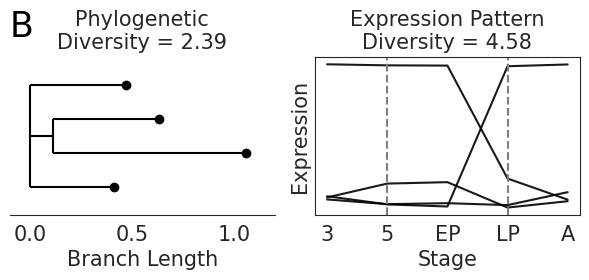

In [177]:
sns.set_style('white')
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(6, 3))

for id in arrestin_ids:
    sns.lineplot(arrestin_df_final, y = id, x='Stage', ax=ax2, color="black", alpha=0.9)


#ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticklabels(["3", "5", "EP", "LP", "A"], fontsize=15)
ax2.set_yticks([])

ax1.set_title("Phylogenetic\nDiversity = 2.39", fontsize=15)
ax2.set_title("Expression Pattern\nDiversity = 4.58", fontsize=15)
ax1.tick_params(axis='x', labelsize=15)

ax1.set_xlabel("Branch Length", fontsize=15)
ax2.set_ylabel("Expression", fontsize=15)
ax2.set_xlabel("Stage", fontsize=15)

#phylogenetic trees
#load and plot phylogenetic tree
a_tree = Phylo.read("/home/gabe/Desktop/mtstp/data/intermediate_data/case_study/arrestin.aln.fa.treefile", "newick")
a_tree.rooted = True
Phylo.draw(a_tree, do_show=False, axes=ax1,label_func=no_labels_clade)

ax1.set_xlim(-0.1,1.2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

#add lines
ax2.axvline(x=1, color='tab:gray', linestyle='--')
ax2.axvline(x=3, color='tab:gray', linestyle='--')

ax1.scatter(0.47, 1, color='black', marker='o')
ax1.scatter(0.41, 4, color='black', marker='o')
ax1.scatter(1.06, 3, color='black', marker='o')
ax1.scatter(0.63, 2, color='black', marker='o')

ax1.text(-0.1, -0.4, s='B', fontsize=25, color='black')

plt.tight_layout()
plt.savefig("/home/gabe/Desktop/mtstp/figures/primary/example_b.pdf")

/tmp/ipykernel_59449/997269558.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["3", "5", "EP", "LP", "A"],fontsize=15)


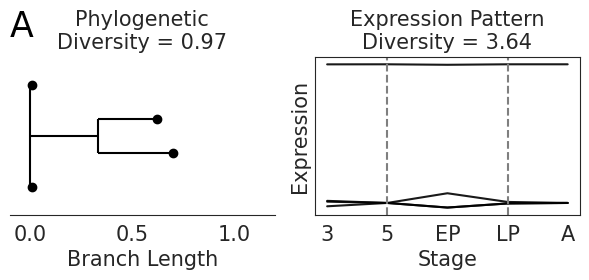

In [176]:
sns.set_style('white')
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(6, 3))

for id in geranylgeranyl_ids:
    sns.lineplot(geranylgeranyl_df_final, y = id, x='Stage', ax=ax2, color="black", alpha=0.9)


#ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticklabels(["3", "5", "EP", "LP", "A"],fontsize=15)
ax2.set_yticks([])

ax1.set_title("Phylogenetic\nDiversity = 0.97",fontsize=15)
ax2.set_title("Expression Pattern\nDiversity = 3.64", fontsize=15)

ax2.set_ylabel("Standardized Expression")

ax1.set_xlabel("Branch Length", fontsize=15)
ax2.set_ylabel("Expression", fontsize=15)
ax2.set_xlabel("Stage", fontsize=15)
ax1.tick_params(axis='x', labelsize=15)

#phylogenetic trees
#load and plot phylogenetic tree
g_tree = Phylo.read("/home/gabe/Desktop/mtstp/data/intermediate_data/case_study/geranylgeranyl.aln.fa.treefile", "newick")
g_tree.rooted = True
Phylo.draw(g_tree, do_show=False, axes=ax1,label_func=no_labels_clade)
ax1.set_xlim(-0.1,1.2)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

#add tip points for visibility
ax1.scatter(0.01, 1, color='black', marker='o')
ax1.scatter(0.01, 4, color='black', marker='o')
ax1.scatter(0.70, 3, color='black', marker='o')
ax1.scatter(0.62, 2, color='black', marker='o')

#add lines
ax2.axvline(x=1, color='tab:gray', linestyle='--')
ax2.axvline(x=3, color='tab:gray', linestyle='--')

ax1.text(-0.1, -0.4, s='A', fontsize=25, color='black')

plt.tight_layout()
plt.savefig("/home/gabe/Desktop/mtstp/figures/primary/example_a.pdf")

### Correlation between phylogenetic divergence and expression pattern divergence example